# **Tarea 02 - Calculo de medidas de tendencia central**

Jhonatan Yael Martínez Vargas - A01734193

Luis Adrián Díaz Santana González - A01734193

Francisco Antonio López Ricardez -A01737275

En la actualidad, el análisis de datos se está convirtiendo en una actividad recurrente dentro del mundo empresarial, pues permite examinar, transformar y modelar datos con el fin de extraer información útil. Esto hace que sea una herramienta muy útil al momento de optimizar procesos, tomar decisiones y descubrir patrones que puedan generar predicciones.

Por ese mismo motivo a continuación se presenta un breve ejemplo de cómo usando la librería pandas de python, se pueden extraer las medidas de tendencia central de una base de datos libre proveniente del e-commerce “Ulabox”, y como estas mismas ayudan a entender cual es comportamiento del negocio.

---

### **Paso 01**

Se importa la libreria, se guardan los datos del archivo .csv y se muestra el dataframe generado

###### *Nota: en este caso separamos los datos en diferentes dataframes para que posteriormente se visualizen de mejor manera.*

In [8]:
import pandas as pd
import seaborn as sns
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("ulabox_orders_with_categories_partials_2017.csv")

customer_df = df[['customer']]
items = df[['total_items']]
disconut = df[['discount%']]
date_df = df[['weekday', 'hour']]
departments = df[['Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%']]

df

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,10235,29995,4,0.00,5,10,5.80,0.00,51.30,0.00,0.00,0.00,0.0,42.9
29996,10236,29996,1,0.00,7,21,0.00,0.00,0.00,0.00,100.00,0.00,0.0,0.0
29997,10237,29997,54,0.00,4,17,9.25,0.00,77.48,13.27,0.00,0.00,0.0,0.0
29998,10237,29998,10,0.00,5,10,0.00,0.00,100.00,0.00,0.00,0.00,0.0,0.0


Observando el data frame anterior nos percatamos que la base de datos con la que estamos trabajando contiene la informacion de **30,000** compras realizadas, en este caso cada una de las columnas representa lo sigueinte:

- **Customer:** Numero de cliente.

- **Order:** Numero de pedido.

- **Total_items:** Total de objetos comprados.

- **Discount:** Porcentaje de descuento aplicado a la compra.

- **Weekday:** Dia de la semana en la que se realizo la compra.

- **Hour:** Hora en la que se realizo la compra.

- **Food:** Porcentaje de la compra destinada a alimentos.

- **Fresh:** Porcentaje de la compra destinada aproductos frescos.

- **Drinks:** Porcentaje de la compra destinada a bebidas.

- **Home:**  Porcentaje de la compra destinada a productos para el hogar. 

- **Beauty:**  Porcentaje de la compra destinada a productos de belleza.

- **Health:**  Porcentaje de la compra destinada al cuidado de la salud.

- **Baby:**  Porcentaje de la compra destinada a productos de bebe.

- **Pets:**  Porcentaje de la compra destinada a productos para la mascota.


---

### **Paso 02**

Una vez identificados los datos con los que se va a trabajar es necesario calcular las medidas de tendencia central, para esto usamos los metodos ***describe*** y ***mode*** para los casos en donde se requiera.

In [9]:
print("Freccuencia de compra por cliente")
customer_df.pivot_table(columns = ['customer'], aggfunc = 'size')

Freccuencia de compra por cliente


customer
0         3
1        20
2         1
3        23
4        29
         ..
10234     1
10235     1
10236     1
10237     2
10238     1
Length: 10239, dtype: int64

In [10]:
print("Medidas de tendencia central de los objetos comprado")
items.describe()

Medidas de tendencia central de los objetos comprado


,total_items
count,30000.000000
mean,31.739933
std,20.576579
min,1.000000
25%,18.000000
50%,29.000000
75%,41.000000
max,298.000000


In [11]:
print("Moda de los objetos comprados")
items.mode()

Moda de los objetos comprados


,total_items
0,25


Con esta informacion se puede apreciar que para un total de **30,000** ventas, el ***promedio*** de productos de que se compran osciala entre **31 y 32 articulos**, mientras que la mayoria de la gente compra **25 articulos**.

O dicho de otra manera:
* Para el **25%** de las ventas la gente compra menos de 18 articulos.
* Para el **50%** de las ventas la gente compra menos de 29 articulos.
* Para el **75%** de las ventas la gente compra menos de 41 articulos.

In [12]:
# Agrupar el numero de productos comprados por cada usuario
citems_df = df.groupby("customer")["total_items"].sum()
citems_df

customer
0        134
1        623
2         26
3        639
4        496
        ... 
10234      1
10235      4
10236      1
10237     64
10238      2
Name: total_items, Length: 10239, dtype: int64

In [13]:
# Agrupar cada usuario con el promedio de porcentaje que se aplica por descuento
disconut_mean_df = df.groupby("customer")["discount%"].mean()
disconut_mean_df

customer
0        14.110000
1        17.849000
2         2.970000
3         4.102174
4         4.373103
           ...    
10234     0.000000
10235     0.000000
10236     0.000000
10237     0.000000
10238     0.000000
Name: discount%, Length: 10239, dtype: float64

<Axes: >

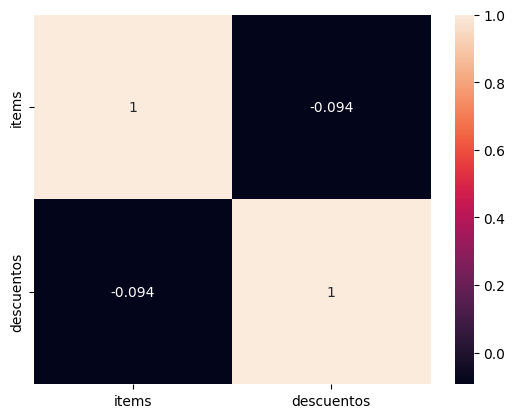

In [38]:
# Crear los dataframes
df1 = pd.DataFrame({"items": citems_df.values})
df2 = pd.DataFrame({"descuentos" : disconut_mean_df})

# Combinar los dataframes
df_merged = df1.join(df2)
df_merged

sns.heatmap(df_merged.corr(), annot = True)

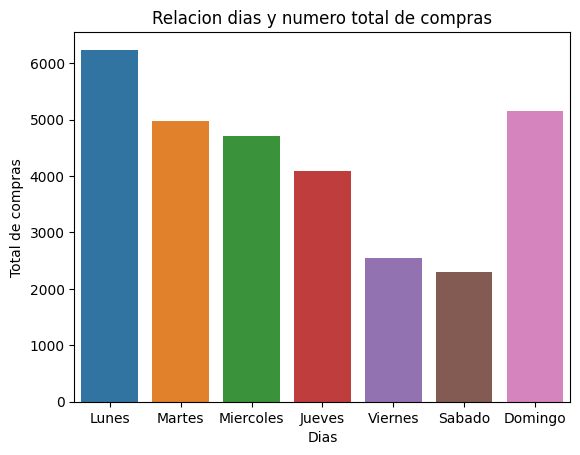

In [15]:
weekdays_frec = date_df.pivot_table(columns = ['weekday'], aggfunc = 'size')

weekdays = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
weekdays_grafic = sns.barplot(x = weekdays, y =  weekdays_frec.values)
weekdays_grafic.set(xlabel ="Dias", ylabel = "Total de compras", title ='Relacion dias y numero total de compras');


[Text(0.5, 0, 'Horarios'),
 Text(0, 0.5, 'Total de compras'),
 Text(0.5, 1.0, 'Numero de compras por hora')]

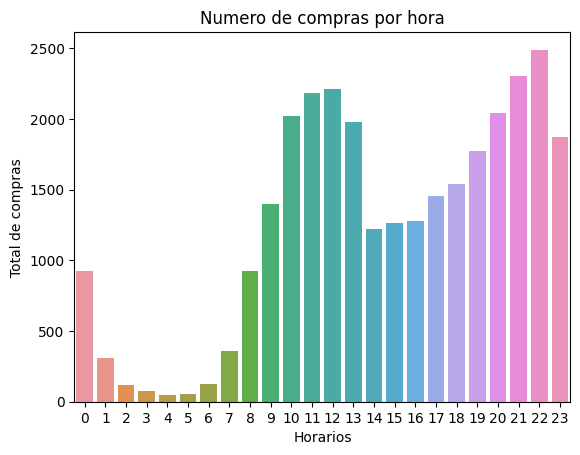

In [16]:
time_frec = date_df.pivot_table(columns = ['hour'], aggfunc = 'size')

time_grafic = sns.barplot(x = time_frec.index, y = time_frec.values)
time_grafic.set(xlabel ="Horarios", ylabel = "Total de compras", title ='Numero de compras por hora')


En base a los datos arrojados respecto a la moda de fechas de compra, podemos analizar que la mayoria de compras se hacen el día **lunes** a las **22:00 hrs**. 

Medidas de tendencia central de los porcentajes de compras por departamento


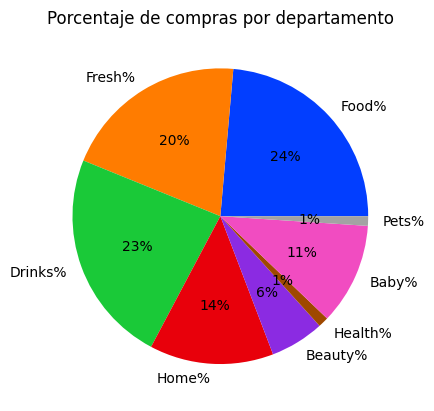

In [17]:
print("Medidas de tendencia central de los porcentajes de compras por departamento")

departments_mean = departments.mean()

colors = sns.color_palette('bright')
plt.pie(departments_mean.values, labels = departments_mean.index ,colors = colors, autopct = '%0.0f%%')

plt.title("Porcentaje de compras por departamento")
plt.show()
#sns.pie(x = departments_mean.index, y = departments_mean.values)

Para mejorar el número de ventas de una tienda es importante saber que productos se venden más y cuales menos para así podr enfocarse más en los que se venden menos, esto facilmente se puede saber con la media obtenida de la tabla de medidadas de tendencia central; Analizando la media de cada porcentaje se ve que los que más sobresalen son **FOOD**, **DRINKS** y **FRESH**, los demás productos difieren bastante en ventas comparado con los que más se vende, esto se puede traducir en que no hay tanta variedad de productos aparte de los más vendidos o es que los productos que se venden no son de los que prefieren los clientes, también puede ser que los precios sean algo elevados.

---
### **Clustering**